In [2]:
import os
from uuid import UUID
import contextily as ctx
import osmnx as ox
import seaborn as sns

from spad.etl import read_csv
from spad.bounding_box import BoundingBox

In [3]:
fname = "/mnt/tod/data/gridwise-gps-locations/cmu_honda_clb_oct_1_15_2019.csv"

In [4]:
df = read_csv(fname)

In [4]:
df.isna().any().any()

False

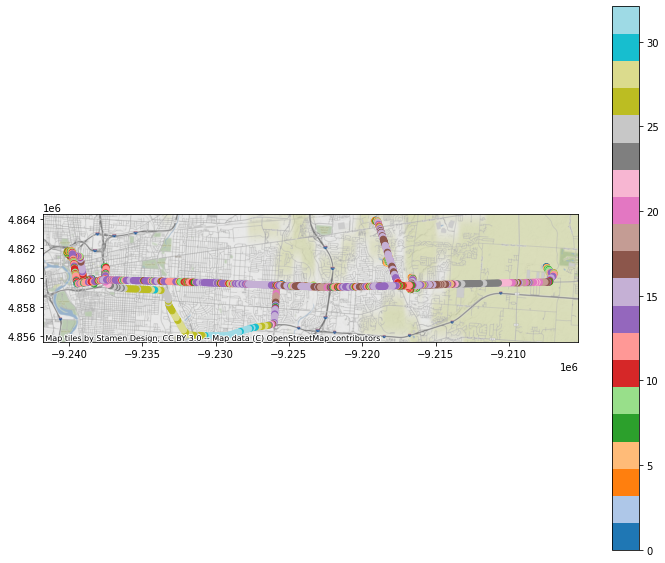

In [32]:
driver = UUID("ff1d999c-5fc9-465d-af6c-8e8ef1343376")
trajectory = df.xs((driver, 432323), level=('driver_id', 'shift_id'))
trajectory = trajectory.to_crs(epsg=3857)
ax = trajectory.plot('speed', figsize=(12, 10), cmap="tab20", legend=True)
ctx.add_basemap(ax)

In [5]:
bbox = BoundingBox.from_geodataframe(df)
network = bbox.to_osmnx()

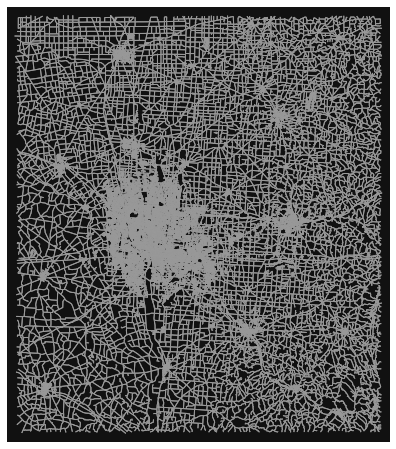

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
ox.plot_graph(network, node_size=0)

In [7]:
nodes_df, links_df = ox.graph_to_gdfs(network)

In [14]:
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj
print(pyproj.__version__)

3.0.0.post1


In [37]:
crs_info = pyproj.database.query_utm_crs_info(
	datum_name="WGS84",
	area_of_interest=AreaOfInterest(
		north_lat_degree=bbox.north,
		south_lat_degree=bbox.south,
		east_lon_degree=bbox.east,
		west_lon_degree=bbox.west,
	),
	contains=True,
).pop()


In [38]:
crs = pyproj.CRS.from_authority(crs_info.auth_name, crs_info.code)

In [46]:
links_df = links_df.to_crs(crs)

In [47]:
df = df.to_crs(crs)

In [56]:
buffered_trajectory = df.geometry.buffer(200.0)

[237959,
 225601,
 226782,
 237964,
 237958,
 237962,
 237957,
 237963,
 220975,
 237955]

(316628.1546011467, 4424543.393559381)